Bonus (Optional)

As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:


Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.) This step may require some research. Feel free to use the code below to get started. Be sure to make any necessary modifications for your username, password, host, port, and database name:
from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/<your_db_name>')
connection = engine.connect()

Create a histogram to visualize the most common salary ranges for employees.

Create a bar chart of average salary by title.

In [1]:
!pip install psycopg2

In [6]:
#Dependenies
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt

In [7]:
#Create engine and connection
engine = create_engine('postgresql://localhost:5432/workplace_db')
connection = engine.connect()
engine

Engine(postgresql://localhost:5432/workplace_db)

In [5]:
# Check database is being read
# Query All Records in the the Database
emp_df = engine.execute("SELECT * FROM salaries")

for record in data:
    print(record)

NameError: name 'data' is not defined

Most Common Salary Ranges

-Create a histogram to represent most common salary ranges

In [10]:
# Query All Records in the the Database

# Query All Records in the the Database and get a high level view of the stats (min, max, median) especially of the salary breakdown.
salaries_df = pd.read_sql("SELECT * FROM salaries", connection)
print(salaries_df.head())
salaries_df.describe()

   emp_no  salary
0   10001   60117
1   10002   65828
2   10003   40006
3   10004   40054
4   10005   78228


,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


In [11]:
salaries_df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


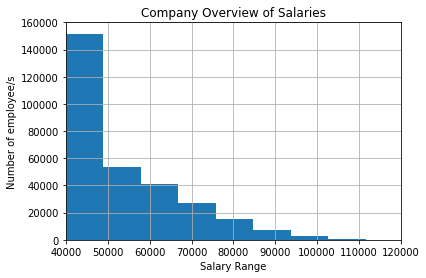

In [33]:
salary_graph=salaries_df.hist(column="salary",bins=10)
salary_graph

# Set a title for the chart
plt.title("Company Overview of Salaries")
plt.ylabel("Number of employee/s")
plt.xlabel("Salary Range")

#Set x-axis and y-axis range
plt.xlim(40000,120000)
plt.ylim(0,160000)

#Save figure
plt.savefig("Company Overview of Salaries.png",bbox_inches="tight")
plt.show()

Create a bar chart of average salary by title.

In [20]:
# Salary max is just under 130,000.

#Create 4 bins 
#Range of bin = 130,000/4=32,000
bins=[0,32000,64000,96000,128000]

#Create group names
group_names=["<$32k","$32-64k","64-96k","96-128k"]

#Create new column with bin categories
#Note: closed=left indicates the start value of range(left) is included but the right value of range(right) is not included.
salaries_df["Salary Category"]=pd.cut(salaries_df["salary"], bins=bins, right=True, include_lowest=True, labels=group_names)
salaries_df

#Count emp_no by Salary Category grouping
salaries_gp_df=salaries_df.groupby(["Salary Category"])
salaries_gp_df=salaries_gp_df.count()
#Reset index
salaries_gp_df=salaries_gp_df.reset_index()

salaries_gp_df

,Salary Category,emp_no,salary
0,<$32k,0,0
1,$32-64k,235138,235138
2,64-96k,62551,62551
3,96-128k,2334,2334


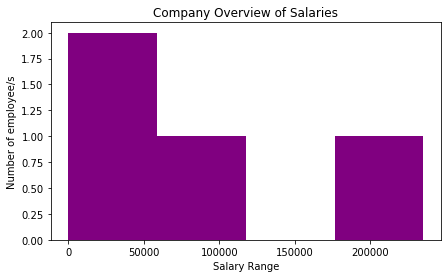

In [36]:
#Use DataFrame.plot() in order to create a bar chart of the data
salaries_gp_df.plot(kind="hist", bins=4,figsize=(7,4), x='Salary Category',y="salary", rot=0, color="purple", legend=False);

# Set a title for the chart
plt.title("Company Overview of Salaries")
plt.ylabel("Number of employee/s")
plt.xlabel("Salary Range")

#Save figure
plt.savefig("Company Overview of Salaries.png",bbox_inches="tight")
plt.show()
